<a href="https://colab.research.google.com/github/EmmanuelEjima/Assignment/blob/main/Solar_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Create a small dataset
data = {
    'Date': ['2025-01-01','2025-01-02','2025-01-03','2025-01-04','2025-01-05',
             '2025-01-06','2025-01-07','2025-01-08','2025-01-09','2025-01-10'],
    'Location': ['Lagos','Lagos','Lagos','Lagos','Lagos','Abuja','Abuja','Abuja','Abuja','Abuja'],
    'Solar_Irradiance_Wm2': [820,780,650,900,720,950,880,710,980,850],
    'Temperature_C': [32,31,30,33,29,34,33,30,35,32],
    'Panel_Tilt_deg': [25,25,25,25,25,20,20,20,20,20],
    'Panel_Azimuth_deg': [180]*10,
    'Wind_Speed_mps': [3.2,3.6,4.0,2.9,4.5,2.8,3.1,4.2,2.5,3.4],
    'Humidity_%': [65,67,70,63,72,60,62,68,58,64],
    'DC_Power_W': [3420,3300,2840,3660,2975,3920,3680,3050,4030,3550],
    'AC_Power_W': [3200,3085,2650,3435,2760,3660,3430,2845,3765,3300]
}

df = pd.DataFrame(data)

# Show the dataset
df.head()


,Date,Location,Solar_Irradiance_Wm2,Temperature_C,Panel_Tilt_deg,Panel_Azimuth_deg,Wind_Speed_mps,Humidity_%,DC_Power_W,AC_Power_W
0,2025-01-01,Lagos,820,32,25,180,3.2,65,3420,3200
1,2025-01-02,Lagos,780,31,25,180,3.6,67,3300,3085
2,2025-01-03,Lagos,650,30,25,180,4.0,70,2840,2650
3,2025-01-04,Lagos,900,33,25,180,2.9,63,3660,3435
4,2025-01-05,Lagos,720,29,25,180,4.5,72,2975,2760


In [2]:
df.shape

(10, 10)

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10 non-null     object 
 1   Location              10 non-null     object 
 2   Solar_Irradiance_Wm2  10 non-null     int64  
 3   Temperature_C         10 non-null     int64  
 4   Panel_Tilt_deg        10 non-null     int64  
 5   Panel_Azimuth_deg     10 non-null     int64  
 6   Wind_Speed_mps        10 non-null     float64
 7   Humidity_%            10 non-null     int64  
 8   DC_Power_W            10 non-null     int64  
 9   AC_Power_W            10 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 932.0+ bytes


,Solar_Irradiance_Wm2,Temperature_C,Panel_Tilt_deg,Panel_Azimuth_deg,Wind_Speed_mps,Humidity_%,DC_Power_W,AC_Power_W
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.00000
mean,824.000000,31.900000,22.500000,180.0,3.420000,64.900000,3442.500000,3213.00000
std,108.443534,1.911951,2.635231,0.0,0.649444,4.408325,400.674778,377.50791
min,650.000000,29.000000,20.000000,180.0,2.500000,58.000000,2840.000000,2650.00000
25%,735.000000,30.250000,20.000000,180.0,2.950000,62.250000,3112.500000,2905.00000
50%,835.000000,32.000000,22.500000,180.0,3.300000,64.500000,3485.000000,3250.00000
75%,895.000000,33.000000,25.000000,180.0,3.900000,67.750000,3675.000000,3433.75000
max,980.000000,35.000000,25.000000,180.0,4.500000,72.000000,4030.000000,3765.00000


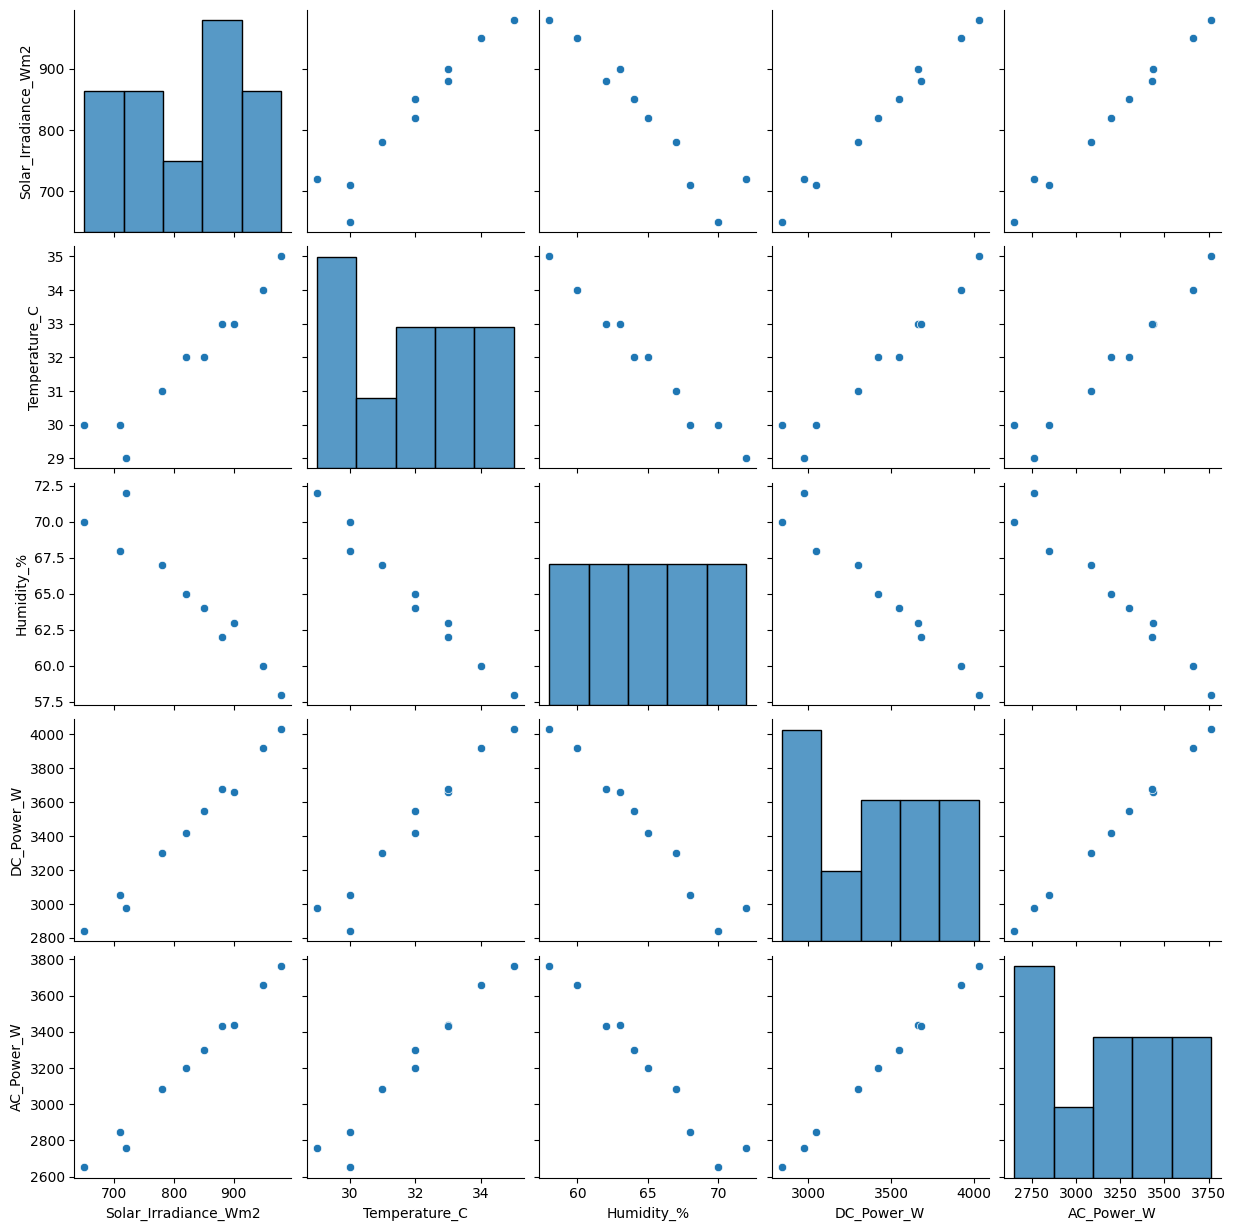

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Solar_Irradiance_Wm2','Temperature_C','Humidity_%','DC_Power_W','AC_Power_W']])
plt.show()


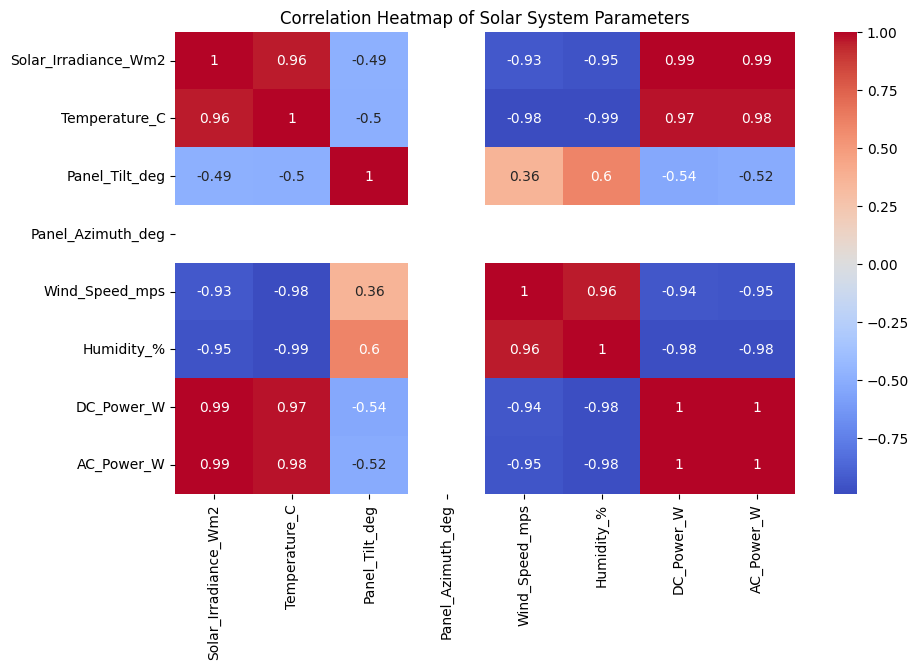

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Solar System Parameters")
plt.show()



In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location_Encoded'] = le.fit_transform(df['Location'])



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[['Solar_Irradiance_Wm2','Temperature_C','Wind_Speed_mps','Humidity_%']]
y = df['AC_Power_W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.811587781141869


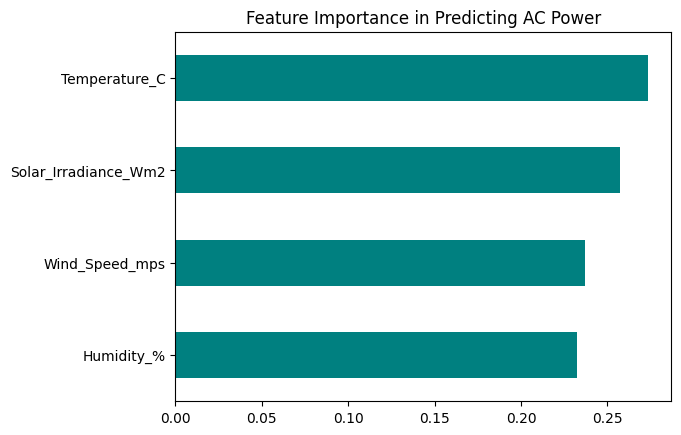

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Predicting AC Power")
plt.show()


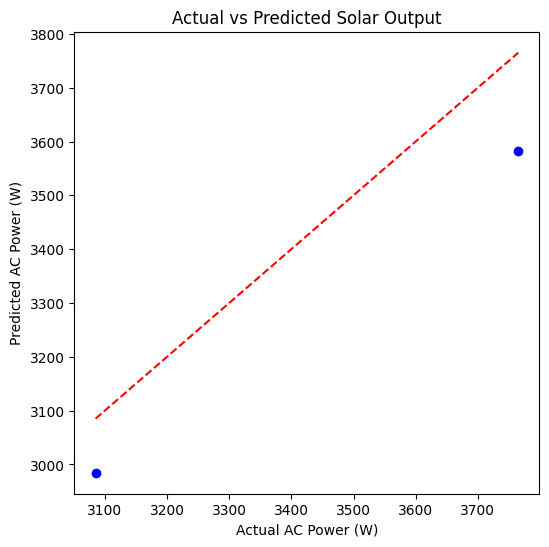

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual AC Power (W)')
plt.ylabel('Predicted AC Power (W)')
plt.title('Actual vs Predicted Solar Output')
plt.show()


In [13]:
X = df[['Solar_Irradiance_Wm2','Temperature_C','Wind_Speed_mps','Humidity_%','Location_Encoded']]


,Date,Location,Solar_Irradiance_Wm2,Temperature_C,Panel_Tilt_deg,Panel_Azimuth_deg,Wind_Speed_mps,Humidity_%,DC_Power_W,AC_Power_W,Location_Encoded
0,2025-01-01,Lagos,820,32,25,180,3.2,65,3420,3200,1
1,2025-01-02,Lagos,780,31,25,180,3.6,67,3300,3085,1
2,2025-01-03,Lagos,650,30,25,180,4.0,70,2840,2650,1
3,2025-01-04,Lagos,900,33,25,180,2.9,63,3660,3435,1
4,2025-01-05,Lagos,720,29,25,180,4.5,72,2975,2760,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[['Solar_Irradiance_Wm2','Temperature_C','Wind_Speed_mps','Humidity_%']]
y = df['AC_Power_W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.811587781141869
